In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

### Data

In [2]:
%run preprocessing ../data/SRAD2018/ 1,2 ../data False contiguous --nt 10

Processing subdirectory: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:28<00:00, 174.68it/s]
2it [01:51, 55.51s/it]

In [3]:
%run preprocessing ../data/SRAD2018/ 1 ../data True contiguous --nt 10

Processing subdirectory: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:29<00:00, 340.18it/s]
1it [00:29, 29.82s/it]

In [2]:
from predrain import *
sz = 256
nt = 1
bs = 6 # calculate this
num_gpus = 1
gpu_start = 3

In [3]:
mt = ModelType.PredNetLeakyRelu
pred_mode = 'contiguous'

In [4]:
P = Predrain()
P.set_config(sz, nt, bs, mt, num_gpus, gpu_start, pred_mode, allow_growth=False)

In [5]:
P.get_data(pred_mode=pred_mode, idx=range(1, 1 + 2))

((<tf.Tensor 'IteratorGetNext:0' shape=(?, 10, 256, 256, 1) dtype=float32>,
  <tf.Tensor 'zeros:0' shape=(6, 1) dtype=float32>),
 (<tf.Tensor 'IteratorGetNext_1:0' shape=(?, 10, 256, 256, 1) dtype=float32>,
  <tf.Tensor 'zeros_1:0' shape=(6, 1) dtype=float32>),
 54000,
 6000)

In [6]:
P.get_model(mt, stateful=False)

In [11]:
# P.load(ModelType.PredNetOriginal, 128, pred_mode, 1)
P.model.load_weights('../data/models/checkpoints/weights.PredNetOriginal_128.01.h5')

sz=256 transfered from sz=128

In [ ]:
P.train(2)

Epoch 1/2
 6665/18000 [==========>...................] - ETA: 6:08:34 - loss: 0.0232

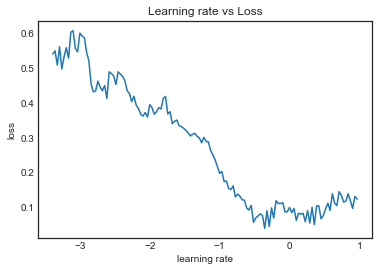

In [51]:
LRFinder.plot_schedule_from_file('../data/models/lrs/PredNetOriginal_256/', 50)

In [46]:
P.path_lrs

PosixPath('../data/models/lrs/PredNetLeakyRelu_256')

find lr on leaky prednet

In [36]:
mt = ModelType.PredNetLeakyRelu

In [37]:
P = Predrain()
P.set_config(sz, nt, bs, mt, num_gpus, gpu_start, allow_growth=False)

In [38]:
P.get_data(pred_mode='skip')

/usr/local/anaconda3/envs/pred-rain/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


((<tf.Tensor 'IteratorGetNext_8:0' shape=(?, 10, 256, 256, 1) dtype=float32>,
  <tf.Tensor 'zeros_8:0' shape=(6, 1) dtype=float32>),
 (<tf.Tensor 'IteratorGetNext_9:0' shape=(?, 10, 256, 256, 1) dtype=float32>,
  <tf.Tensor 'zeros_9:0' shape=(6, 1) dtype=float32>),
 22500,
 2500)

In [39]:
P.get_model(mt)

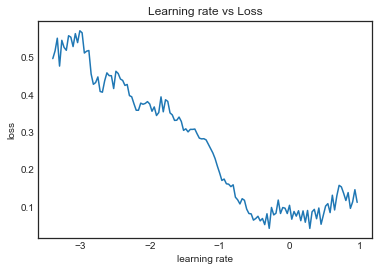

In [45]:
lrfinder.plot_schedule(50)

In [ ]:
P.load(ModelType.PredNetO)

upsample

In [55]:
sz = 256
bs = 6

In [60]:
P = Predrain()
P.set_config(sz, nt, bs, mt, num_gpus, gpu_start, allow_growth=False, comment='from_128')
P.get_data(pred_mode='skip')
P.get_model(mt)

/usr/local/anaconda3/envs/pred-rain/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


In [61]:
P.load(ModelType.PredNetOriginal, 128, 1)

In [ ]:
P.train(4, 1e-1)

Epoch 1/4
 1210/15000 [=>............................] - ETA: 7:47:39 - loss: 0.0445

nt = 5

In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
from predrain import *
sz = 256
nt = 1
bs = 6
num_gpus = 1
gpu_start = 0
comment='nt5_from_scratch'

In [5]:
mt = ModelType.PredNetLeakyRelu
pred_mode = PredMode.Skip1

In [4]:
P = Predrain()
P.set_config(sz, nt, bs, mt, num_gpus, gpu_start, pred_mode, allow_growth=False, comment=comment)

In [5]:
P.get_data(idx=range(1, 1 + 5))

((<tf.Tensor 'IteratorGetNext:0' shape=(?, 5, 256, 256, 1) dtype=float32>,
  <tf.Tensor 'zeros:0' shape=(6, 1) dtype=float32>),
 (<tf.Tensor 'IteratorGetNext_1:0' shape=(?, 5, 256, 256, 1) dtype=float32>,
  <tf.Tensor 'zeros_1:0' shape=(6, 1) dtype=float32>),
 112500,
 12500)

In [6]:
P.get_model(mt, output_mode='error', stateful=False)

In [7]:
P.load(mt, 256, idx=2, comment='nt5_from_scratch')

loaded ../data/models/checkpoints/weights.PredNetLeakyRelu_256_skip_nt5_from_scratch.02.h5


In [ ]:
P.train(epochs=3, max_lr=1e-3)

Epoch 1/3
 3242/56250 [>.............................] - ETA: 11:14:05 - loss: 0.0428

In [16]:
P.model.save_weights('2.2.1.h5')

[autoreload of models.model_factory failed: Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/pred-rain/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/anaconda3/envs/pred-rain/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/usr/local/anaconda3/envs/pred-rain/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/local/anaconda3/envs/pred-rain/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/zyc/jupyter/tianchi/pred-rain/yang/models/model_factory.py", line 3, in <module>
    from .darkprednet i

In [7]:
P.model.load_weights('2.2.1.h5')

In [ ]:
P.fit(2, 1e-3, initial_epoch=1)

Epoch 2/2
  708/37500 [..............................] - ETA: 8:13:16 - loss: 0.0432

In [1]:
P.model.save_weights('prednet_final.h5')

NameError: name 'P' is not defined